**Análisis y Modelado**

Análisis y Modelado de Data para nuestro modelo de Machine Learning

In [57]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns

Luego de importar las librerías ingestaremos con un archivo JSON y convertiremos sus líneas en objeto de Python para almacenarlos en la lista 'rows'. Al final del proceso, la lista 'rows' contendrá todos los objetos del archivo JSON.

In [58]:
rows = []
with open('steam_games.json') as file:
    for line in file.readlines():
        rows.append(ast.literal_eval(line))

Convertimos la lista 'rows' en un DataFrame de pandas y luego inspeccionamos los datos.

In [59]:
df = pd.DataFrame(rows)
df.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN


A continuación verificamos, con una visión general de los datos, su estructura y observaremos los detalles.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32135 entries, 0 to 32134
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       24083 non-null  object 
 1   genres          28852 non-null  object 
 2   app_name        32133 non-null  object 
 3   title           30085 non-null  object 
 4   url             32135 non-null  object 
 5   release_date    30068 non-null  object 
 6   tags            31972 non-null  object 
 7   discount_price  225 non-null    float64
 8   reviews_url     32133 non-null  object 
 9   specs           31465 non-null  object 
 10  price           30758 non-null  object 
 11  early_access    32135 non-null  bool   
 12  id              32133 non-null  object 
 13  developer       28836 non-null  object 
 14  sentiment       24953 non-null  object 
 15  metascore       2677 non-null   object 
dtypes: bool(1), float64(1), object(14)
memory usage: 3.7+ MB


A continuación utilizaremos un gráfico de barras para visualizar los valores nulos.

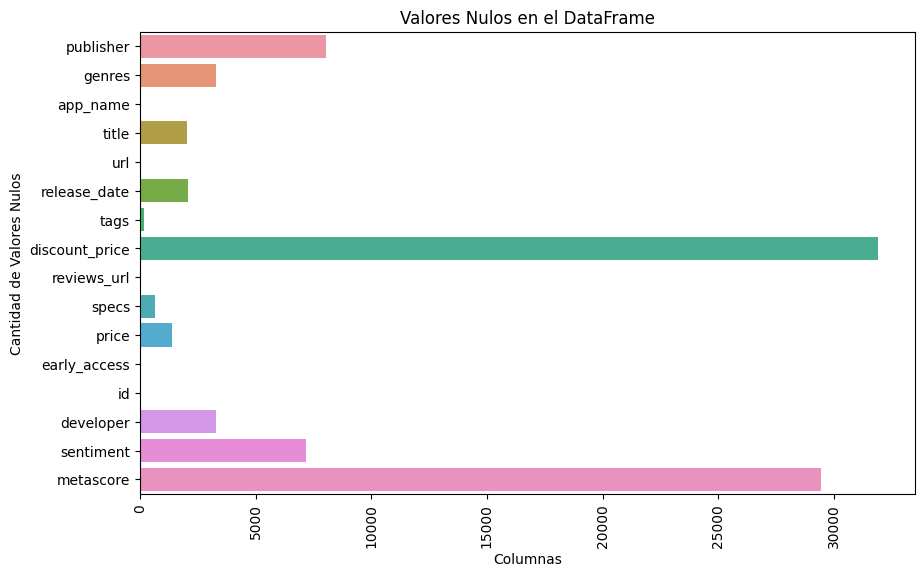

In [61]:

plt.figure(figsize=(10, 6))
sns.barplot(x=df.isna().sum(), y=df.columns)
plt.xticks(rotation=90)
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Nulos')
plt.title('Valores Nulos en el DataFrame')
plt.show()


**Limpieza**

Descartamos las columnas de URLs e IDs que no son relevantes para el modelo de Machine Learning.
+ las que se suman

In [62]:
df = df.drop(['url', 'reviews_url', 'id','publisher', 'metascore', 'developer', 'sentiment' ], axis=1)

Verificamos

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32135 entries, 0 to 32134
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genres          28852 non-null  object 
 1   app_name        32133 non-null  object 
 2   title           30085 non-null  object 
 3   release_date    30068 non-null  object 
 4   tags            31972 non-null  object 
 5   discount_price  225 non-null    float64
 6   specs           31465 non-null  object 
 7   price           30758 non-null  object 
 8   early_access    32135 non-null  bool   
dtypes: bool(1), float64(1), object(7)
memory usage: 2.0+ MB


A continuación calcularemos y verificaremos cuántos registros duplicados fueron eliminados y cuántos registros totales existen en el DataFrame original.

In [64]:
filas = df.shape[0]

df.drop_duplicates(subset=['app_name',
                           'title',
                           'release_date',
                           'discount_price',
                           'price',
                           'early_access'], inplace=True)

duplicados = filas - df.shape[0]

print(f"Filas: {filas}")
print(f"Filas duplicadas: {duplicados}")

Filas: 32135
Filas duplicadas: 2


Haremos una lista con los nombres de las columnas del DataFrame

In [65]:
df.columns.to_list()

['genres',
 'app_name',
 'title',
 'release_date',
 'tags',
 'discount_price',
 'specs',
 'price',
 'early_access']

**VARIABLES**

Analisaremos las siguientes variables

*PRICE*

Esta es una de las variables más valiosas, no solo por la información que nos puede dar, sino porque será la que intentemos predecir.

Comenzaremos con una visualización

In [66]:
df.head()

,genres,app_name,title,release_date,tags,discount_price,specs,price,early_access
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,[Single-player],4.99,False
1,"[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False
2,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False
3,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,2017-12-07,"[Action, Adventure, Casual]",0.83,[Single-player],0.99,False
4,NaN,Log Challenge,NaN,NaN,"[Action, Indie, Casual, Sports]",1.79,"[Single-player, Full controller support, HTC V...",2.99,False


Luego de la visualización notamos que hay varios juegos que son considerados 'Free to play' y juegos que no tienen precio, NaN.

Ambos son considerados com un obstáculo si lo que queremos es calcular el precio de los juegos.

Por este motivo, a continuación haremos primero un conteo y luego los eliminaremos.

Conteo Free to play Games:

In [67]:
free = (df['price'].str.lower() == 'free to play').sum()
print(f'Free to play Games: {free}')

Free to play Games: 982


Conteo Juegos sin precio:

In [68]:
sin_precio = df['price'].isna().sum()

print(f'Juegos sin precio: {sin_precio}')

Juegos sin precio: 1377



Convertiremos la columna 'price' en valores numéricos y dejaremos como NaN aquellos que no podramos convertir.

Luego verificamos:

In [69]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df.head()

,genres,app_name,title,release_date,tags,discount_price,specs,price,early_access
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,[Single-player],4.99,False
1,"[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,"[Single-player, Multi-player, Online Multi-Pla...",NaN,False
2,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,"[Single-player, Multi-player, Online Multi-Pla...",NaN,False
3,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,2017-12-07,"[Action, Adventure, Casual]",0.83,[Single-player],0.99,False
4,NaN,Log Challenge,NaN,NaN,"[Action, Indie, Casual, Sports]",1.79,"[Single-player, Full controller support, HTC V...",2.99,False


A continuación eliminaremos las filas que contienen valores nulos en la columna 'price'.

Y luego verificamos.

In [70]:
df.dropna(subset=['price'], inplace=True)
df.head()

,genres,app_name,title,release_date,tags,discount_price,specs,price,early_access
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,[Single-player],4.99,False
3,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,2017-12-07,"[Action, Adventure, Casual]",0.83,[Single-player],0.99,False
4,NaN,Log Challenge,NaN,NaN,"[Action, Indie, Casual, Sports]",1.79,"[Single-player, Full controller support, HTC V...",2.99,False
5,"[Action, Adventure, Simulation]",Battle Royale Trainer,Battle Royale Trainer,2018-01-04,"[Action, Adventure, Simulation, FPS, Shooter, ...",NaN,"[Single-player, Steam Achievements]",3.99,False
6,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Basic Pass,SNOW - All Access Basic Pass,2018-01-04,"[Free to Play, Indie, Simulation, Sports]",NaN,"[Single-player, Multi-player, Online Multi-Pla...",9.99,False


*Descuento (discount_price)*

Transformamos los valores de las columnas 'discount_price' y 'discount' en datos numéricos para facilitar su procesamiento.

In [71]:
df['discount_price'] = pd.to_numeric(df['discount_price'], errors='coerce')

Calculamos el 'Descuento Promedio' que se aplica:

In [72]:
print(f"Descuento promedio: {round((1 - ((df.discount_price / df.price).mean())), 2) * 100}%")

Descuento promedio: 38.0%


Buscamos una relación entre 'precio' y 'precio con descuento'

In [73]:
print(f"Coeficiente de Pearson: {round(df['discount_price'].corr(df['price']), 2)}")

Coeficiente de Pearson: 0.91


Observamos que existe una correlación significativa entre estas dos variables, ya que el precio con descuento tiende a ser un porcentaje del precio original del juego, con un promedio de descuento del 38%.

Dado este patrón, abordaremos la variable desde una perspectiva binaria: "con descuento" y "sin descuento", y exploraremos la correlación desde una nueva perspectiva.

In [74]:
df_discount = df.copy()

In [75]:
df_discount['discount_price'] = (df_discount['discount_price'] > 0).astype(int)
df_discount.head()

,genres,app_name,title,release_date,tags,discount_price,specs,price,early_access
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",1,[Single-player],4.99,False
3,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,2017-12-07,"[Action, Adventure, Casual]",1,[Single-player],0.99,False
4,NaN,Log Challenge,NaN,NaN,"[Action, Indie, Casual, Sports]",1,"[Single-player, Full controller support, HTC V...",2.99,False
5,"[Action, Adventure, Simulation]",Battle Royale Trainer,Battle Royale Trainer,2018-01-04,"[Action, Adventure, Simulation, FPS, Shooter, ...",0,"[Single-player, Steam Achievements]",3.99,False
6,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Basic Pass,SNOW - All Access Basic Pass,2018-01-04,"[Free to Play, Indie, Simulation, Sports]",0,"[Single-player, Multi-player, Online Multi-Pla...",9.99,False


Completamos los valores faltantes (NaN) en la columna 'discount_price' con valor 0 utilizando. 
Cualquier celda vacía en la columna 'discount_price' será reemplazada por 0, lo que indica que no hay ningún descuento en esos casos.

Luego verificamos

In [76]:
df_discount['discount_price'] = df_discount['discount_price'].fillna(0)
df_discount.head()

,genres,app_name,title,release_date,tags,discount_price,specs,price,early_access
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",1,[Single-player],4.99,False
3,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,2017-12-07,"[Action, Adventure, Casual]",1,[Single-player],0.99,False
4,NaN,Log Challenge,NaN,NaN,"[Action, Indie, Casual, Sports]",1,"[Single-player, Full controller support, HTC V...",2.99,False
5,"[Action, Adventure, Simulation]",Battle Royale Trainer,Battle Royale Trainer,2018-01-04,"[Action, Adventure, Simulation, FPS, Shooter, ...",0,"[Single-player, Steam Achievements]",3.99,False
6,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Basic Pass,SNOW - All Access Basic Pass,2018-01-04,"[Free to Play, Indie, Simulation, Sports]",0,"[Single-player, Multi-player, Online Multi-Pla...",9.99,False


A continuación calculanremos y mostraremos la cantidad de juegos en oferta y la cantidad de juegos a precio de lista en el DataFrame.

In [77]:
de_oferta = df_discount['discount_price'].sum()
de_lista = df_discount.shape[0] - de_oferta

print(f"Oferta: {de_oferta}")
print(f"Lista: {de_lista}")

Oferta: 160
Lista: 28686


Notamos una correlación bastante baja.

In [78]:
print(f"Coeficiente de Pearson: {round(df_discount['discount_price'].corr(df_discount['price']), 3)}")

Coeficiente de Pearson: -0.013


Es lógico que la correlación sea limitada, dado que la cantidad de juegos en oferta es reducida. 

Debido a que incluso los títulos más destacados eventualmente se ofertan y estas ofertas son temporales, la presencia de descuentos está sujeta al momento de recopilación de los datos. 

Por estos motivos, optamos por eliminar la columna de descuentos, ya que podría impactar negativamente en el modelo.

In [79]:
df = df.drop(['discount_price'], axis=1)

*Release Date*

Es probable que el año de lanzamiento de un juego tenga un impacto en su precio, dado que los precios tienden a aumentar con el tiempo de manera generalizada. Además, el mes de lanzamiento podría también influir, ya que ciertos meses pueden ser más propicios para los lanzamientos o coincidir con eventos especiales como las festividades navideñas.

Por esta razón, vamos a introducir columnas para representar los años de lanzamiento de los juegos. En cuanto a las fechas, llevaremos a cabo la imputación de algunos valores faltantes y luego procederemos a convertirlas al formato DateTime.

In [80]:
df['release_date'] = df['release_date'].str.replace('Coming ', '')

df['release_date'] = df['release_date'].str.replace('End', 'Dec')

df['release_date'] = df['release_date'].str.replace('Q1', 'Feb')
df['release_date'] = df['release_date'].str.replace('Q2', 'May')
df['release_date'] = df['release_date'].str.replace('Q3', 'Aug')
df['release_date'] = df['release_date'].str.replace('Q4', 'Nov')

df['release_date'] = df['release_date'].str.replace('Early', 'Mar')
df['release_date'] = df['release_date'].str.replace('Late 2016 - Early 2017', 'Mar')
df['release_date'] = df['release_date'].str.replace('Late', 'Nov')

df['release_date'] = df['release_date'].str.replace('Spring', 'Apr')
df['release_date'] = df['release_date'].str.replace('Summer', 'Jul')
df['release_date'] = df['release_date'].str.replace('Autumn', 'Oct')
df['release_date'] = df['release_date'].str.replace('Winter', 'Jan')

df['date1'] = pd.to_datetime(df["release_date"], format="%b %Y", errors='coerce') # Feb 2017
df['date2'] = pd.to_datetime(df["release_date"], format="%B %Y", errors='coerce') # Aug 2017

df['release_date'] = pd.to_datetime(df["release_date"], errors='coerce')

In [81]:
df['release_date'] = df['release_date'].fillna(df['date1'])
df['release_date'] = df['release_date'].fillna(df['date2'])
df = df.drop(['date1', 'date2'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28846 entries, 0 to 32134
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   genres        26079 non-null  object        
 1   app_name      28845 non-null  object        
 2   title         27244 non-null  object        
 3   release_date  27236 non-null  datetime64[ns]
 4   tags          28719 non-null  object        
 5   specs         28233 non-null  object        
 6   price         28846 non-null  float64       
 7   early_access  28846 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(5)
memory usage: 1.8+ MB


Calculamos el porcentaje de nulls

In [82]:
nulos = df.release_date.isna().sum()

print(f'Porcentaje de nulos: {round((nulos / filas * 100), 2)}%')

Porcentaje de nulos: 5.01%


A continuación prodecemos a eleminar el porcentaje de nulos.

In [83]:
df.dropna(inplace=True)
df.isna().sum().sort_values(ascending=False)

genres          0
app_name        0
title           0
release_date    0
tags            0
specs           0
price           0
early_access    0
dtype: int64

Vamos a desglosar la columna de fechas en una nueva columna para el año.

In [85]:
df['year'] = df['release_date'].dt.year
df[['release_date', 'year']].head()

,release_date,year
0,2018-01-04,2018
3,2017-12-07,2017
5,2018-01-04,2018
6,2018-01-04,2018
7,2018-01-04,2018


A continuacón eliminaremos la columna 'release_date'.
Luego verificamos la lista actualizada de nombres de columnas en el DataFrame.

In [86]:
df.drop('release_date', axis=1, inplace=True)

df.columns

Index(['genres', 'app_name', 'title', 'tags', 'specs', 'price', 'early_access',
       'year'],
      dtype='object')

*Genres, Tags y Specs*

Estas tres variables representan características de los juegos y comparten un formato similar. 

Serán tratadas como variables categóricas nominales y serán desglosadas en variables dummy, creando una para cada valor único de estas variables. 

De considerarlo necesario eliminaremos alguna de ellas.

In [87]:
df[['title','genres', 'tags', 'specs', 'price']].head()

,title,genres,tags,specs,price
0,Lost Summoner Kitty,"[Action, Casual, Indie, Simulation, Strategy]","[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99
3,弹炸人2222,"[Action, Adventure, Casual]","[Action, Adventure, Casual]",[Single-player],0.99
5,Battle Royale Trainer,"[Action, Adventure, Simulation]","[Action, Adventure, Simulation, FPS, Shooter, ...","[Single-player, Steam Achievements]",3.99
6,SNOW - All Access Basic Pass,"[Free to Play, Indie, Simulation, Sports]","[Free to Play, Indie, Simulation, Sports]","[Single-player, Multi-player, Online Multi-Pla...",9.99
7,SNOW - All Access Pro Pass,"[Free to Play, Indie, Simulation, Sports]","[Free to Play, Indie, Simulation, Sports]","[Single-player, Multi-player, Online Multi-Pla...",18.99


Investigaremos por qué algunos registros están etiquetados como "Free to Play" pero aún tienen un precio asignado.

In [88]:
df_exploded = df.explode('tags')

df_exploded['tags'] = df_exploded['tags'].str.lower()

df_exploded.head()

,genres,app_name,title,tags,specs,price,early_access,year
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,strategy,[Single-player],4.99,False,2018
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,action,[Single-player],4.99,False,2018
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,indie,[Single-player],4.99,False,2018
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,casual,[Single-player],4.99,False,2018
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,simulation,[Single-player],4.99,False,2018


In [90]:
mask = df_exploded['tags'] == 'free to play'
df_exploded = df_exploded[mask]
print(f"Cantidad de registros: {df_exploded.shape[0]}\n")
df_exploded[['title', 'tags', 'price']].sample(10)

Cantidad de registros: 1095



,title,tags,price
7261,Paladins® - Founder's Pack,free to play,19.99
15965,Hide and Seek - Gearhead,free to play,0.99
10376,Zaccaria Pinball - House of Diamonds 2017 Table,free to play,2.99
12937,Golden Hornet (Donationware),free to play,0.99
7991,Pixel Puzzles Ultimate - Puzzle Pack: Ireland,free to play,2.99
18274,Fishing Planet: Largemouth Bass April Pack,free to play,19.99
31739,Penumbra: Black Plague Gold Edition,free to play,9.99
4350,One Way To Die: Deluxe Edition,free to play,0.99
23430,World of Guns: Sniper Rifles Pack #1,free to play,9.99
29685,King's Bounty: Legions | Champion of the Realm...,free to play,9.99


Si examinamos los títulos, observamos que se trata de paquetes o pases

In [92]:
paquetes = df['title'].str.contains('pack', case=False)
paquetes = paquetes.fillna(False)
df_paquetes = df[paquetes]
print(f"Cantidad de registros que son paquetes: {df_paquetes.shape[0]}\n")
df_paquetes.head()

Cantidad de registros que son paquetes: 3026



,genres,app_name,title,tags,specs,price,early_access,year
16,"[Free to Play, Indie, Simulation, Sports]",SNOW - Starter Pack,SNOW - Starter Pack,"[Free to Play, Indie, Simulation, Sports]","[Single-player, Multi-player, Online Multi-Pla...",14.99,False,2018
18,"[Free to Play, Indie, Simulation, Sports]",SNOW - Lifetime Pack,SNOW - Lifetime Pack,"[Free to Play, Indie, Simulation, Sports]","[Single-player, Multi-player, Online Multi-Pla...",59.99,False,2018
27,"[Action, Indie, Racing]",Carmageddon Max Pack,Carmageddon Max Pack,"[Racing, Action, Classic, Indie, Gore, 1990's,...","[Single-player, Multi-player, Steam Trading Ca...",9.99,False,1997
89,[Action],QUAKE Mission Pack 1: Scourge of Armagon,QUAKE Mission Pack 1: Scourge of Armagon,"[Action, FPS, Classic, Shooter, First-Person, ...","[Single-player, Multi-player, Steam Cloud]",2.99,False,1997
92,[Action],QUAKE Mission Pack 2: Dissolution of Eternity,QUAKE Mission Pack 2: Dissolution of Eternity,"[Action, FPS, Shooter, Classic, First-Person]","[Single-player, Multi-player, Steam Cloud]",2.99,False,2007


In [93]:
pase = df['title'].str.contains('pass', case=False)
pase = pase.fillna(False)
df_pase = df[pase]
print(f"Cantidad de registros que son Pass: {df_pase.shape[0]}\n")
df_pase.sample(5)

Cantidad de registros que son Pass: 127



,genres,app_name,title,tags,specs,price,early_access,year
5338,[Action],Street Fighter V - Season 1 Character Pass,Street Fighter V - Season 1 Character Pass,"[Action, Fighting]","[Single-player, Multi-player, Cross-Platform M...",19.99,False,2016
30249,[Simulation],Train Simulator: Marias Pass Route Add-On,Train Simulator: Marias Pass Route Add-On,"[Simulation, Trains]","[Single-player, Downloadable Content, Steam Ac...",19.99,False,2013
9992,"[Action, Sports]",TEKKEN 7 - Season Pass,TEKKEN 7 - Season Pass,"[Action, Sports, Fighting]","[Single-player, Multi-player, Online Multi-Pla...",24.99,False,2017
8,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Legend Pass,SNOW - All Access Legend Pass,"[Free to Play, Indie, Simulation, Sports]","[Single-player, Multi-player, Online Multi-Pla...",29.99,False,2018
4990,"[Design &amp; Illustration, Web Publishing]",RPG Maker MV - Season Pass,RPG Maker MV - Season Pass,"[Design & Illustration, Web Publishing]","[Downloadable Content, Partial Controller Supp...",29.99,False,2015


Como se puede observar en los cuadros anteriores, encontramos registros que corresponden a paquetes o pases. Sin embargo, no los vamos a separar o eliminar, ya que nuestro objetivo es predecir el precio de cualquier elemento en la tienda de Steam, no solo los juegos.

Ahora procederemos a crear las variables dummy correspondientes, las cuales permitirán identificar los elementos etiquetados como "free to play".

In [94]:
# Lista de los valores únicos de las columnas genres, tags y specs

df_genres = df.explode('genres')
lista_genres = df_genres['genres'].str.lower().unique().tolist()
print(f"genres unicos: {len(lista_genres)}")

df_tags = df.explode('tags')
lista_tags = df_tags['tags'].str.lower().unique().tolist()
print(f"tags unicos: {len(lista_tags)}")

df_specs = df.explode('specs')
lista_specs = df_specs['specs'].str.lower().unique().tolist()
print(f"specs unicos: {len(lista_specs)}")

# Concatenamos
lista_completa = lista_genres + lista_tags + lista_specs
print(f"listas sumadas: {len(lista_completa)}")

set_completo = set(lista_completa)
lista_unicos = list(set_completo)
print(f"valores unicos combinados: {len(lista_unicos)}")

genres unicos: 21
tags unicos: 336
specs unicos: 28
listas sumadas: 385
valores unicos combinados: 363


Podemos ver la cantidad de columnas que estaríamos agregando al Dataset.

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25799 entries, 0 to 32133
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        25799 non-null  object 
 1   app_name      25799 non-null  object 
 2   title         25799 non-null  object 
 3   tags          25799 non-null  object 
 4   specs         25799 non-null  object 
 5   price         25799 non-null  float64
 6   early_access  25799 non-null  bool   
 7   year          25799 non-null  int32  
dtypes: bool(1), float64(1), int32(1), object(5)
memory usage: 1.5+ MB


Reemplazaremos los valores nulos en la columna "genres" y "specs" por listas vacías lo que nos permitirá concatenar las listas correspondientes sin perder información. 

La columna "tags" dejará de ser tenida en cuenta y será eliminada más adelante. 

In [96]:
isna = df['specs'].isna()
df.loc[isna, 'specs'] = pd.Series([[]] * isna.sum()).values

isna = df['genres'].isna()
df.loc[isna, 'genres'] = pd.Series([[]] * isna.sum()).values

Concatenamos las features en una nueva columna.

In [97]:
df['features'] = df['genres'] + df['specs']
df[['features', 'genres', 'specs']]

,features,genres,specs
0,"[Action, Casual, Indie, Simulation, Strategy, ...","[Action, Casual, Indie, Simulation, Strategy]",[Single-player]
3,"[Action, Adventure, Casual, Single-player]","[Action, Adventure, Casual]",[Single-player]
5,"[Action, Adventure, Simulation, Single-player,...","[Action, Adventure, Simulation]","[Single-player, Steam Achievements]"
6,"[Free to Play, Indie, Simulation, Sports, Sing...","[Free to Play, Indie, Simulation, Sports]","[Single-player, Multi-player, Online Multi-Pla..."
7,"[Free to Play, Indie, Simulation, Sports, Sing...","[Free to Play, Indie, Simulation, Sports]","[Single-player, Multi-player, Online Multi-Pla..."
...,...,...,...
32129,"[Action, Adventure, Casual, Indie, Single-play...","[Action, Adventure, Casual, Indie]","[Single-player, Steam Achievements, Steam Cloud]"
32130,"[Casual, Indie, Simulation, Strategy, Single-p...","[Casual, Indie, Simulation, Strategy]","[Single-player, Steam Achievements]"
32131,"[Casual, Indie, Strategy, Single-player, Steam...","[Casual, Indie, Strategy]","[Single-player, Steam Achievements, Steam Clou..."
32132,"[Indie, Racing, Simulation, Single-player, Ste...","[Indie, Racing, Simulation]","[Single-player, Steam Achievements, Steam Trad..."


Los datos duplicados de cada lista serán eliminados.

In [98]:
df['features'] = df['features'].apply(lambda x: list(set(x)))

Generamos las dummies.

In [99]:
print(df.shape[1])

df_dummies = pd.get_dummies(df.features.explode(), drop_first=True).groupby(level=0).sum()
print(df_dummies.shape[1])

columnas_categoricas = df_dummies.columns.tolist()

df = pd.concat([df, df_dummies], axis=1, join='inner')
print(df.shape[1])

9
48
57


Eliminamos las columnas features, genres, tags y specs.

In [100]:
df = df.drop(['features', 'genres', 'tags', 'specs'], axis=1)

*Title y App Name*

Debido a la complejidad del proceso necesario para una evaluación y procesamiento responsable, y la limitación de tiempo, se eliminaran ambas variables.

In [101]:
df = df.drop(['title', 'app_name'], axis=1)

*Exploracion de nulos y outlayers*

Virifiquemos valores y precios

In [102]:
filas = df.shape[0]

print(f'Registros: {filas}\n')

df.isna().sum().sort_values(ascending=False)

Registros: 25799



price                         0
Stats                         0
Online Multi-Player           0
Partial Controller Support    0
Photo Editing                 0
RPG                           0
Racing                        0
Shared/Split Screen           0
Simulation                    0
Single-player                 0
Software Training             0
Sports                        0
Steam Achievements            0
Multi-player                  0
Steam Cloud                   0
Steam Leaderboards            0
Steam Trading Cards           0
Steam Turn Notifications      0
Steam Workshop                0
SteamVR Collectibles          0
Strategy                      0
Utilities                     0
Valve Anti-Cheat enabled      0
Video Production              0
Online Co-op                  0
Massively Multiplayer         0
early_access                  0
Downloadable Content          0
year                          0
Adventure                     0
Animation &amp; Modeling      0
Audio Pr

In [103]:
df['price'].sort_values(ascending=False).head(60)

12088    995.00
2392     771.71
14304    499.99
17794    499.99
9074     399.99
9075     399.99
4445     299.99
29566    299.99
26852    289.99
17793    249.99
15394    202.76
22535    199.99
14959    199.99
15424    199.99
22820    199.00
28498    189.96
16446    172.24
30353    160.91
13944    149.99
9076     149.99
2335     149.99
13937    149.99
20416    149.99
9798     149.99
12445    149.99
29668    149.99
10908    149.99
3259     139.92
15204    131.40
28061    129.99
4706     119.99
17610    119.99
11420    119.99
9474     119.99
2229     109.99
2640      99.99
21113     99.99
29810     99.99
8889      99.99
10178     99.99
2333      99.99
29865     99.99
1801      99.99
20417     99.99
16932     99.99
22769     99.99
9923      99.99
16828     99.99
8026      99.99
15213     99.99
4273      99.99
2639      99.99
1094      99.99
2468      99.99
22292     99.99
2038      99.99
14309     99.99
20685     99.99
14308     99.99
4702      99.99
Name: price, dtype: float64

In [104]:
df['price'].sort_values(ascending=True).head()

23942    0.49
25623    0.49
4023     0.50
3855     0.89
16106    0.95
Name: price, dtype: float64

In [105]:
df_out = df['price'] < 130
df_out.sum()

df = df[df_out]

In [56]:
df.to_csv('data_ml.csv', index=False)